In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Admission_Predict.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(400, 9)

In [5]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
x = df.iloc[:,0:-1]

In [9]:
y = df.iloc[:,-1]

In [10]:
x.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0


In [11]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=21)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [14]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [15]:
x_train_scaled

array([[0.47869674, 0.66      , 0.64285714, ..., 1.        , 0.69871795,
        1.        ],
       [0.69674185, 0.36      , 0.39285714, ..., 0.57142857, 0.54166667,
        0.        ],
       [0.68170426, 0.08      , 0.10714286, ..., 0.        , 0.26923077,
        0.        ],
       ...,
       [0.65162907, 0.74      , 0.57142857, ..., 0.57142857, 0.74679487,
        1.        ],
       [0.78195489, 0.42      , 0.53571429, ..., 0.85714286, 0.70512821,
        1.        ],
       [0.51879699, 0.4       , 0.35714286, ..., 0.71428571, 0.39102564,
        1.        ]])

In [16]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [17]:
model = Sequential()

In [18]:
model.add(Dense(7, activation='relu', input_dim=8))
model.add(Dense(7, activation='linear'))
model.add(Dense(1, activation='linear'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 63        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 127 (508.00 Byte)
Trainable params: 127 (508.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
history = model.fit(x_train_scaled,y_train, epochs=100,validation_split=0.2)

Epoch 1/100

8/8 [==============================] - 4s 122ms/step - loss: 0.7057 - val_loss: 0.6250
Epoch 2/100
8/8 [==============================] - 0s 19ms/step - loss: 0.5143 - val_loss: 0.4459
Epoch 3/100
8/8 [==============================] - 0s 17ms/step - loss: 0.3565 - val_loss: 0.3017
Epoch 4/100
8/8 [==============================] - 0s 19ms/step - loss: 0.2340 - val_loss: 0.1872
Epoch 5/100
8/8 [==============================] - 0s 17ms/step - loss: 0.1406 - val_loss: 0.1042
Epoch 6/100
8/8 [==============================] - 0s 17ms/step - loss: 0.0769 - val_loss: 0.0525
Epoch 7/100
8/8 [==============================] - 0s 19ms/step - loss: 0.0414 - val_loss: 0.0274
Epoch 8/100
8/8 [==============================] - 0s 24ms/step - loss: 0.0274 - val_loss: 0.0192
Epoch 9/100
8/8 [==============================] - 0s 21ms/step - loss: 0.0233 - val_loss: 0.0169
Epoch 10/100
8/8 [==============================] - 0s 17ms/step - loss: 0.0214 - val_loss: 0.0153
Epoch 11/100
8/8 

In [22]:
y_pred=model.predict(x_test_scaled)

3/3 [==============================] - 0s 8ms/step


In [23]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test,y_pred)*100

72.5358269044703

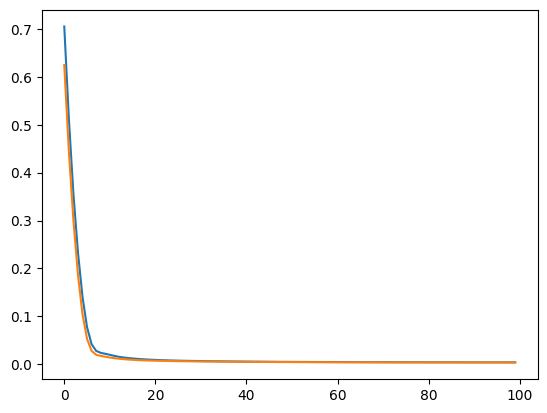

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])